In [1]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 653.6 kB/s eta 0:01:01
   ---------------------------------------- 0.2/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.4/39.5 MB 2.4 MB/s eta 0:00:17
    --------------------------------------- 0.6/39.5 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.2/39.5 MB 4.8 MB/s eta 0:00:09
   - -------------------------------------- 1.2/39.5 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.2/39.5 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.2/39.5 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.2/39.5 MB 4.8 MB/s eta 0:00:08
   - -------------------------------------- 1.2/39.5 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.4/39.5 MB 2.7 MB/s eta 0:00:15
   - ------

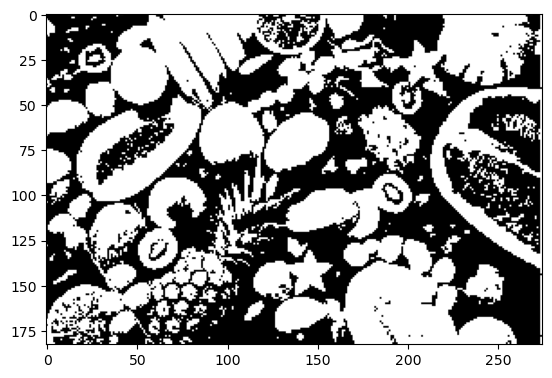

In [5]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_otsu

data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)

thres = threshold_otsu(a)
b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()


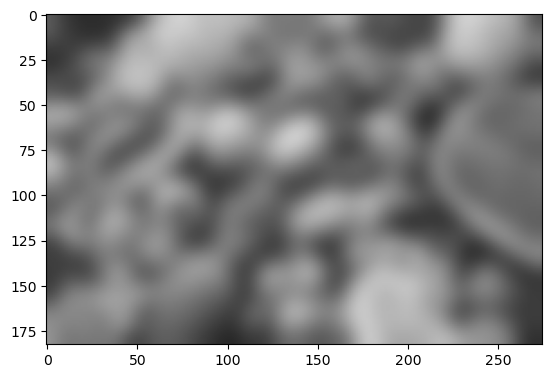

In [6]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)

b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()


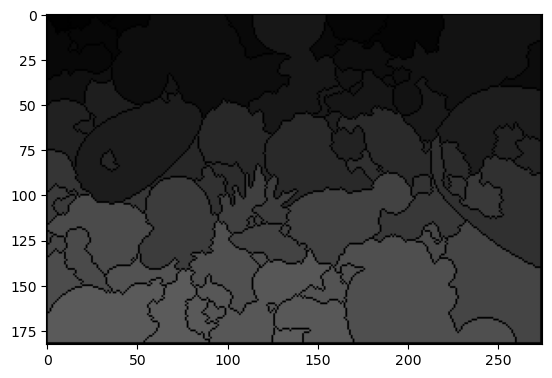

In [7]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')

# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# erosion operation is performed
b2 = cv2.erode(b1, None, iterations=2)

# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)

# thresholding the distance transform image to obtain pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

# performing labeling
labelled, ncc = label(dt)

# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)

# performing watershed
cv2.watershed(data, labelled)

b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


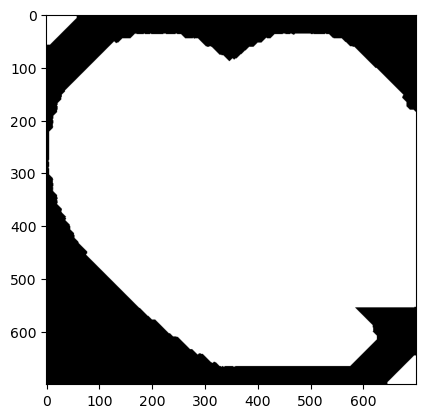

In [9]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

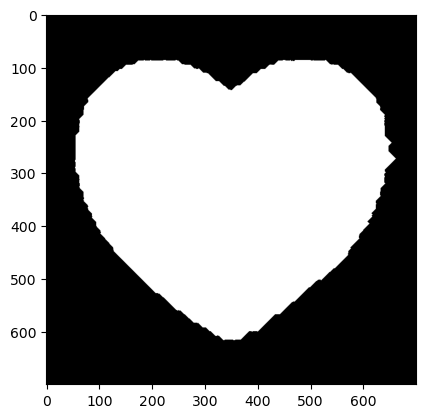

In [12]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.jpg').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

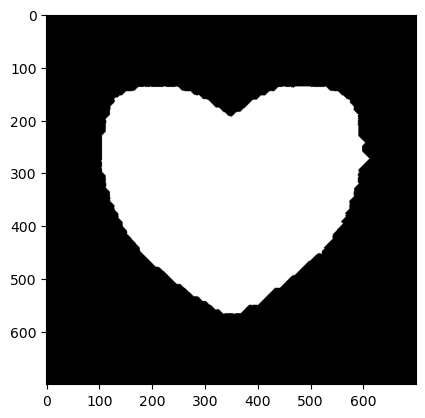

In [13]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.jpg').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

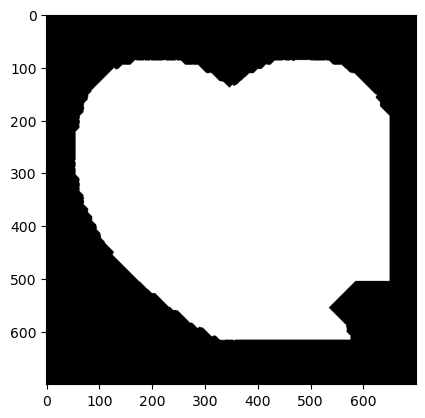

In [14]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.jpg').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()